In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Soft Computing/Financial Distress.csv")

In [4]:
data = data[data.columns.drop(list(data.filter(regex='x80')))]

In [5]:
Y = data.iloc[:,2].values
for y in range(0,len(Y)): # Coverting target variable from continuous to binary form
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = data.iloc[:,3:].values

In [6]:
# Counting number of observations for Healthy and and Bankrupt Companies:
num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)

Number of observations for BANKRUPT companies(1's): 136
Number of observations for HEALTHY companies(0's): 3536


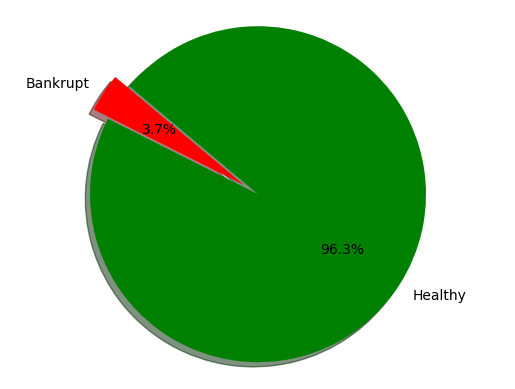

In [7]:

import matplotlib.pyplot as plt
labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [8]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
X_train_wo_sampling = X_train
y_train_wo_sampling = y_train

In [9]:
# Creating more samples units for the bankrupt companies(undersampled data)
y_train = (np.matrix(y_train)).T
y_train = pd.DataFrame(y_train)
y_train.columns = ["Financial_Distress"]
X_train = pd.DataFrame(X_train)
frame = [X_train,y_train]
train_data = pd.concat(frame,axis = 1)
bankrupt_companies = train_data[train_data.Financial_Distress == 1]

feat_mat = bankrupt_companies.iloc[:,:-1].values
response = bankrupt_companies.iloc[:,-1].values
col_mean = np.zeros(shape=(82,1))
col_std = np.zeros(shape=(82,1))
Dim_1 = np.shape(feat_mat)
for i in range(0,Dim_1[1]): # Logic to calculate mean and standard deviation for each column
       col_mean[i,0] = np.mean(feat_mat[:,i])
       col_std[i,0] = np.std(feat_mat[:,i])
col_mean_and_std = np.hstack((col_mean,col_std))

added_data = np.zeros(shape=(1200,Dim_1[1]))
for i in range (0,len(col_mean_and_std)):
       mean_ = col_mean_and_std[i,0]
       std_ = col_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,1200)
added_y = np.ones(shape=(1200,1)) # Creating labels for the added data

X_resampled = np.vstack((X_train,added_data)) # Combining the original data + added data
y_train = np.array(y_train)
y_resampled = np.vstack((y_train,added_y))

Number of observations for BANKRUPT companies(1's): 1295
Number of observations for HEALTHY companies(0's): 2475


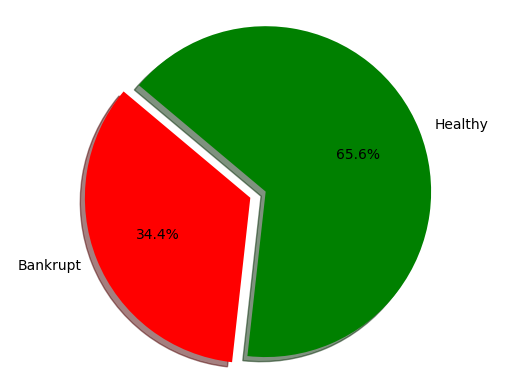

In [10]:
# prompt: Counting number of observations for Healthy and and Bankrupt Companies

num_zeros = 0
for num in y_resampled:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(y_resampled) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)


labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [11]:
''' Standardizing the range of features to have a mean of 0 and standard deviation of 1
allows for better performance and faster convergence during model training.'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

In [ ]:


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
  'C': [0.1, 1, 10, 100, 1000],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Create the grid search object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the grid search object to the data
grid.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid.best_params_

# Print the best parameters
print(f"Best parameters: {best_params}")


In [ ]:

# Create the SVM classifier with the best parameters
svm_classifier = SVC(**best_params)

# Train the SVM classifier on the training data
svm_classifier.fit(X_resampled, y_resampled)

# Predict the labels of the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the SVM classifier
accuracy = svm_classifier.score(X_test, y_test)

# Print the accuracy of the SVM classifier
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9519056261343013


In [ ]:
# prompt: calc Precision  and Recall  and F1 score and Accuracy

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the precision, recall, and F1 score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")


Precision: 0.34210526315789475
Recall: 0.3170731707317073
F1 score: 0.32911392405063294
Accuracy: 0.9519056261343013


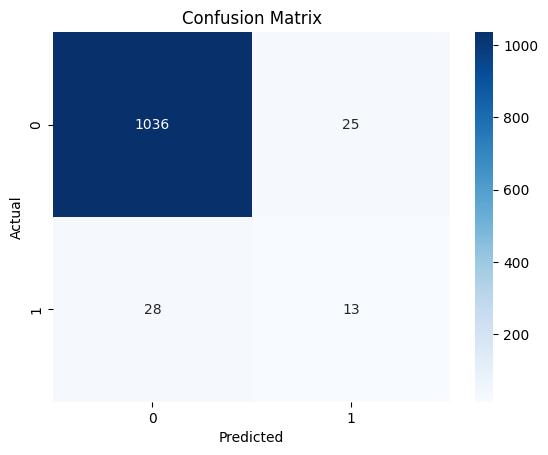

In [ ]:
# prompt: plot a  convution matrex

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Set the labels for the axes
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title of the plot
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [ ]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pyswarms as ps
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define binary PSO
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Define bounds
max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)

# Objective function
# def f_per_particle(m, alpha):
#     """Computes for the objective function per particle

#     Inputs
#     ------
#     m : numpy.ndarray
#         Binary mask that can be obtained from BinaryPSO, will
#         be used to mask features.
#     alpha: float
#         Penalty factor to control the number of features selected.

#     Returns
#     -------
#     numpy.ndarray
#     """
#     total_features = X.shape[1]
#     # Apply mask to features
#     X_subset = X[:,m>0.5]
#     if X_subset.shape[1] == 0:
#         return float('inf')
#     # Split the dataset
#     X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
#     # Fit the model
#     clf = RandomForestClassifier(n_estimators=50, random_state=42)
#     clf.fit(X_train, y_train)
#     # Predict and calculate accuracy
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     # Calculate objective
#     j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
#     return j

def f_per_particle(m, X, y, alpha):
    """Computes the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    X : numpy.ndarray
        Input features.
    y : numpy.ndarray
        Target labels.
    alpha: float
        Penalty factor to control the number of features selected.

    Returns
    -------
    float
        The computed loss for the particle
    """
    total_features = X.shape[1]
    # Apply mask to features
    X_subset = X[:, m > 0.5]
    if X_subset.shape[1] == 0:
        return float('inf')
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
    # Fit the model
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate objective
    j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j
# Define objective function
# def f(x, alpha=0.5):
#     """Higher-level method to do classification in the
#     whole swarm.

#     Inputs
#     ------
#     x: numpy.ndarray of shape (n_particles, dimensions)
#         The swarm that will perform the search

#     Returns
#     -------
#     numpy.ndarray of shape (n_particles, )
#         The computed loss for each particle
#     """
#     n_particles = x.shape[0]
#     j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
#     return np.array(j)
def f(x, X, y, alpha=0.5):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search
    X : numpy.ndarray
        Input features.
    y : numpy.ndarray
        Target labels.

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], X, y, alpha) for i in range(n_particles)]
    return np.array(j)

# Initialize swarm
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=X.shape[1], options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, X=X, y=Y)


2024-05-03 22:08:25,526 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.139
2024-05-03 22:54:50,699 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.13899340445310077, best pos: [0.51899454 0.4063577  0.54411812 0.79956492 0.24817086 0.55830858
 0.76578152 0.34093928 0.3282223  0.76880531 0.75773769 0.76788662
 0.70009654 0.79773491 0.52619483 0.67897904 0.54941244 0.73611268
 0.8738421  0.54095445 0.54511297 0.81555777 0.56262901 0.50265127
 0.99506222 0.60647474 0.50111325 0.44318863 0.52666344 0.65094521
 0.66559105 0.57610275 0.57914178 0.27152246 0.73603201 0.52994591
 0.50123259 0.46647866 0.51614995 0.74284851 0.56249304 0.70463659
 0.54687202 0.15641744 0.20073391 0.88968453 0.33983036 0.74828978
 0.80285043 0.77046337 0.22741588 0.42696    0.48210461 0.64580393
 0.80357642 0.53917455 0.77931085 0.5252558  0.70712832 0.84580918
 0.5502

In [ ]:
#'pos' is the variable containing the best position returned by optimizer.optimize()
best_pos = np.array(pos)

print("Position as NumPy Array:", best_pos)


In [ ]:
# Define a threshold to determine whether a feature is selected
threshold = 0.6

# Create a boolean mask from 'best_pos' based on the threshold
selected_features_mask = best_pos > threshold

# df_cleaned.columns[:-1] gives you all feature names excluding the target variable
feature_names = data.iloc[:,2:].columns[:-1]  # Modify this as necessary

# Use the mask to select the names of the features
selected_features = feature_names[selected_features_mask]

print("Selected Features:", selected_features)

In [ ]:
selected=selected_features.values.tolist()

In [ ]:
# Filter the DataFrame to include only the selected features
mask = np.isin(data.iloc[:,3:].columns,selected)
X_selected = X[:,mask]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)
